

# Mini Project 2: Movie Box Office Prediction Project

## Introduction
This project aims to provide students with a comprehensive understanding of **data analysis**, **feature engineering**, and building **prediction model** using Python. The following script integrates the various functionalities discussed in the provided code files.

## Code Overview
The code below is a Jupyter Notebook that combines functionalities from data exploration to building prediction models. You can work on each section independently, and then integrate them as a cohesive movie analysis and box office prediction model

## Grading
- Basic tasks (85%) - Submit the task notebook file to Moodle
- Bouns task (20%) - Submit the prediction results to Kaggle

## Instructions for Students

1. **Setup Environment:** Ensure you have all necessary libraries installed, including `pandas`, `sklearn`, `numpy`, and other dependencies required for running the above script. Install the libraries using:
   ```bash
   conda create -n cisc7201_mini02
   conda activate cisc7201_mini02
   conda install conda-forge::python=3.10 conda-forge::pandas conda-forge::numpy conda-forge::scikit-learn conda-forge::matplotlib  
   ```
 


## Task 1 Exploring the Dataset (40%)

- Extract the file to access all datasets located within the "data" folder, within the folder, there is one dataset in "tmdb_5000_movies.csv" file. Extract data from the CSV file to obtain information on movies.
- Your task is to 
 > 1) show some example data in the CSV file to see its data format.
 > 2) carefully examine the characteristics of each dimension of the data. For numerical dimensions, consider the scale of the values and whether there are any outliers. For categorical dimensions, think about how to utilize these categorical features.
 > 3) made a visual analysis of some features of the movie data to help the box office prediction and movie recommendation in the future.


## Task 1.1 Loading data (10%)

- Show some example data in the CSV file to see its data format.
- Your task is to print the tail (5 items) of the data data_movies

In [ ]:
import pandas as pd
import numpy as np
data_movies = pd.read_csv('data/tmdb_5000_movies_train.csv')
# Print the tail (5 items) of the data, write the codes here
print(data_movies.tail())

      budget                                             genres  \
4601  220000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4602    9000  [{"id": 35, "name": "Comedy"}, {"id": 10749, "...   
4603       0  [{"id": 35, "name": "Comedy"}, {"id": 18, "nam...   
4604       0                                                 []   
4605       0                [{"id": 99, "name": "Documentary"}]   

                                               homepage      id  \
4601                                                NaN    9367   
4602                                                NaN   72766   
4603  http://www.hallmarkchannel.com/signedsealeddel...  231617   
4604                        http://shanghaicalling.com/  126186   
4605                                                NaN   25975   

                                               keywords original_language  \
4601  [{"id": 5616, "name": "united states\u2013mexi...                es   
4602                                    

## Task 1.2 Data Preprocessing (10%)


- For reference of data processing, note that the release_date column is stored as a string in the format of year, month, and day (e.g., YYYY-MM-DD).  you can use the following code to convert it into a numeric timestamp (Unix timestamp).
- Your task here is to identifying missing values and fill missing values using the mean, median, or other suitable methods
- Hint: you could refer to [fillna()](https://www.w3schools.com/python/pandas/ref_df_fillna.asp)

In [5]:
# Convert the date into a numerical timestamp format
def process_release_date(data_movies):
    data_movies['release_date'] = pd.to_datetime(data_movies['release_date'], format='%Y-%m-%d', errors='coerce')
    data_movies['release_data'] = data_movies['release_date'].astype('int64') // 10**9
    
process_release_date(data_movies)
# Filling missing values for revenue
# Your code starts here
data_movies['revenue'].fillna(data_movies['revenue'].mean(), inplace=True)

# Print the tail
data_movies[['release_data', 'revenue']].tail()


C:\Users\NH50AF\AppData\Local\Temp\ipykernel_7884\2931543520.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_movies['revenue'].fillna(data_movies['revenue'].mean(), inplace=True)


,release_data,revenue
4601,715564800,2040920
4602,1324857600,0
4603,1381622400,0
4604,1336003200,0
4605,1123200000,0


## Task 1.3 Visualization of the dataset (20%)
- You need to visually analyze the relationship between some features of movie data and revenue, so as to help future box office prediction.
- An example is provided below to generate a scatter plot between budget and revenue

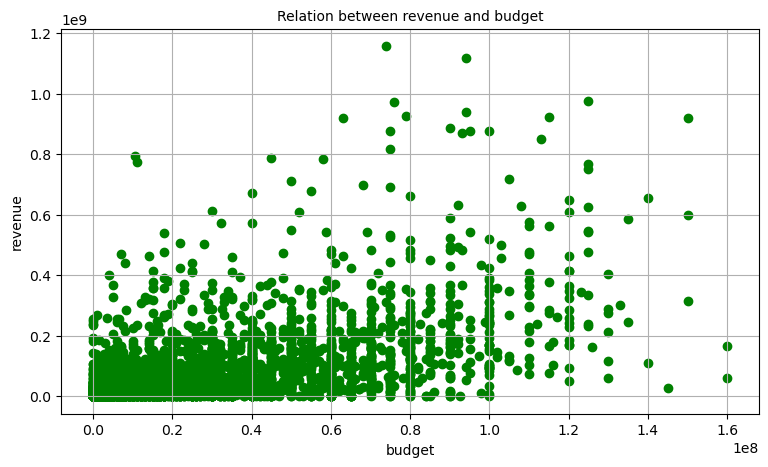

In [6]:
import matplotlib.pyplot as plt
## load data
x1 = np.array(data_movies["budget"])
y1 = np.array(data_movies["revenue"])

fig = plt.figure(1, figsize=(9, 5))

plt.scatter(x1, y1, c=['green'], marker='o')
plt.grid()
plt.xlabel("budget", fontsize=10)
plt.ylabel("revenue", fontsize=10)
plt.title("Relation between revenue and budget", fontsize=10)
plt.show()


###  Your task is to provide visual analysis of other attributes in relation to revenue to aid in feature selection for movie box office (revenue) prediction. 
- You can use other type of plots such as [scatter](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html), [bar](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html), [line](https://www.w3schools.com/python/matplotlib_line.asp), etc.

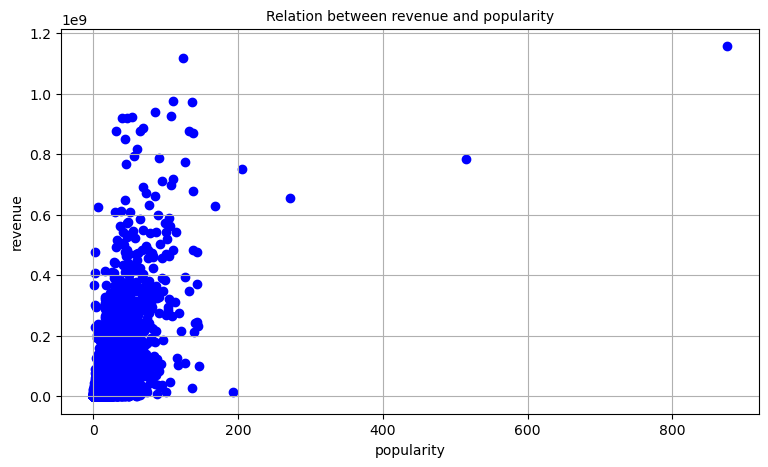

In [7]:
# Write your code here
# Scatter plot between popularity and revenue
x2 = np.array(data_movies["popularity"])
y2 = np.array(data_movies["revenue"])

fig = plt.figure(2, figsize=(9, 5))

plt.scatter(x2, y2, c=['blue'], marker='o')
plt.grid()
plt.xlabel("popularity", fontsize=10)
plt.ylabel("revenue", fontsize=10)
plt.title("Relation between revenue and popularity", fontsize=10)
plt.show()

# Task 2 Feature Engineering (45%)

## Task 2.1: Feature Conversion(15%)

- All features need to be converted into numerical format for computational analysis. Below is an example demonstrating how the genres column can be transformed using multi-hot encoding.

#### Why Multi One-Hot Encoding?
- Multi one-hot encoding is a method used to represent categorical features that can take on multiple values for each instance, such as genres and keywords. In our dataset, each movie can belong to multiple genres and have multiple keywords. By using multi one-hot encoding, we create binary columns representing each possible genre or keyword, with a value of 1 indicating its presence in a particular movie and 0 otherwise. This representation is crucial because it allows machine learning models to understand the presence or absence of specific genres or keywords without assuming any ordinal relationship between them. It also preserves the information about multiple categories being present at the same time, which can be vital for understanding complex relationships between features and the target variable (e.g., revenue). Using this encoding technique ensures that our models can effectively use these categorical features to make better predictions. You can refer to [How to Perform One-Hot Encoding For Multi Categorical Variables](https://www.analyticsvidhya.com/blog/2021/05/how-to-perform-one-hot-encoding-for-multi-categorical-variables/) for details.


- For the genres attribute, the data is initially in the form of a string representing a dictionary. Each dictionary contains an ID and the name of the genre. The same approach applies to the keywords column. See details below

In [8]:
data_movies[['genres','keywords']]

,genres,keywords
0,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 616, ""name"": ""witch""}, {""id"": 1441, ""n..."
1,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""na...","[{""id"": 1321, ""name"": ""gold""}, {""id"": 4668, ""n..."
2,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 911, ""name"": ""exotic island""}, {""id"": ..."
3,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...","[{""id"": 836, ""name"": ""resistance""}, {""id"": 445..."
4,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 9648, ...","[{""id"": 90, ""name"": ""paris""}, {""id"": 113, ""nam..."
...,...,...
4601,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 5616, ""name"": ""united states\u2013mexi..."
4602,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",[]
4603,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...","[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam..."
4604,[],[]


- To achieve this, we will create a lookup table that maps each genre or keyword to a unique numerical value, which will then be used to encode the genres and keywords for each movie.
- Below is the example code of multi one-hot encoding for the genres attribute

In [9]:
import json
from sklearn.cluster import KMeans
import warnings

warnings.simplefilter(action='ignore')

# Extract all unique genres and keywords
all_genres = set()
all_keywords = set()

for i in range(data_movies.shape[0]):
    movie = data_movies.iloc[i]
    genres = eval(movie['genres'])
    for genre in genres:
        all_genres.add(genre['name'])

# Create a lookup table
genre_mapping = {genre: idx for idx, genre in enumerate(all_genres)}

# Encode each sample
def encode_movie(movie):
    genre_vector = np.zeros(len(genre_mapping))
    genres = eval(movie['genres'])
    for genre in genres:
        # One-hot encoding for genres
        genre_vector[genre_mapping[genre['name']]] = 1  
    
    return genre_vector

# Encode all movies
data_movies['genre_encoding'] = None

for i in range(data_movies.shape[0]):
    data_movies['genre_encoding'].iloc[i] = encode_movie(data_movies.iloc[i])
    

- Show thw genre encoding

In [10]:
data_movies['genre_encoding'] 

0       [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1       [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...
2       [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
3       [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
4       [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
                              ...                        
4601    [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...
4602    [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
4603    [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...
4604    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
4605    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...
Name: genre_encoding, Length: 4606, dtype: object

### Your task is to do conversion on the feature of **keywords** referencing to the provided code above
> `movie['keywords']`

In [11]:
# Implemente keywords feature conversion, write your code here
# Extract all unique keywords
for i in range(data_movies.shape[0]):
    movie = data_movies.iloc[i]
    keywords = eval(movie['keywords'])
    for keyword in keywords:
        all_keywords.add(keyword['name'])

# Create a lookup table
keyword_mapping = {keyword: idx for idx, keyword in enumerate(all_keywords)}

# Encode each sample
def encode_keywords(movie):
    keyword_vector = np.zeros(len(keyword_mapping))
    keywords = eval(movie['keywords'])
    for keyword in keywords:
        # One-hot encoding for keywords
        keyword_vector[keyword_mapping[keyword['name']]] = 1  
    
    return keyword_vector

# Encode all movies
data_movies['keyword_encoding'] = None

for i in range(data_movies.shape[0]):
    data_movies['keyword_encoding'].iloc[i] = encode_keywords(data_movies.iloc[i])

## Task 2.2: Feature Alignment and Enhancement (15%)

### Feauture Alignment
After the feature conversion, the one-hot encoding of genres introduces an extra dimension in the DataFrame. To address this, we need to flatten the one-hot encoding.

- Your task is to flatten the `genre_encoding` column to ensure each genre feature is represented in a single dimension rather than in a nested array. The flattening makes it easier for machine learning models to process the data effectively in the bonus task

- Hints: you could refer to [np.flatten()](https://www.geeksforgeeks.org/numpy-ndarray-flatten-function-python/)

In [12]:

# Implement the lambda function to flatten the genre encoding
data_movies['genre_encoding_flattened'] = data_movies['genre_encoding'].apply(lambda x: np.array(x).flatten())

data_movies_flattened = pd.DataFrame(data_movies['genre_encoding_flattened'].tolist(), index=data_movies.index)

data_movies = pd.concat([data_movies, data_movies_flattened], axis=1)
data_movies.drop('genre_encoding', axis=1, inplace=True)

data_movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,10,11,12,13,14,15,16,17,18,19
0,125000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://harrypotter.warnerbros.com/harrypottera...,671,"[{""id"": 616, ""name"": ""witch""}, {""id"": 1441, ""n...",en,Harry Potter and the Philosopher's Stone,Harry Potter has lived under the stairs at his...,109.984351,"[{""name"": ""1492 Pictures"", ""id"": 436}, {""name""...",...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,130000000,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""na...",http://www.ripd.com/,49524,"[{""id"": 1321, ""name"": ""gold""}, {""id"": 4668, ""n...",en,R.I.P.D.,A recently slain cop joins a team of undead po...,39.448066,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...",...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,140000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneyvideos/liveaction/p...,22,"[{""id"": 911, ""name"": ""exotic island""}, {""id"": ...",en,Pirates of the Caribbean: The Curse of the Bla...,"Jack Sparrow, a freewheeling 17th-century pira...",271.972889,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,125000000,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...",http://www.thehungergames.movie/,131631,"[{""id"": 836, ""name"": ""resistance""}, {""id"": 445...",en,The Hunger Games: Mockingjay - Part 1,Katniss Everdeen reluctantly becomes the symbo...,206.227151,"[{""name"": ""Lionsgate"", ""id"": 1632}, {""name"": ""...",...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,125000000,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 9648, ...",http://www.sonypictures.com/homevideo/thedavin...,591,"[{""id"": 90, ""name"": ""paris""}, {""id"": 113, ""nam...",en,The Da Vinci Code,When the curator of the Louvre is found murder...,45.313197,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


### Feature Enhancement
- We can use existing features to generate new feature dimensions, such as budget and revenue: these two fields directly impact box office performance. We can try constructing ROI (Return on Investment), defined as ROI = revenue / budget, to measure investment effectiveness and thereby predict box office performance more accurately.

In [26]:
# Implement the lambda function to calculate the ROI
def ROI(data_movies):
    # Calculate ROI as revenue / budget if budget > 0, else np.nan
    data_movies['ROI'] = data_movies.apply(lambda row: row['revenue'] / row['budget'] if row['budget'] > 0 else np.nan, axis=1)
    # Replace infinite values with NaN
    data_movies['ROI'].replace([np.inf, -np.inf], np.nan, inplace=True)
    # Fill NaN values with the mean ROI
    data_movies['ROI'].fillna(data_movies['ROI'].mean(), inplace=True)
    return data_movies

data_movies = ROI(data_movies)
data_movies["ROI"]

0       1.249889e+09
1       7.587508e+07
2       7.485843e+08
3       9.626883e+08
4       9.828102e+08
            ...     
4601    1.484305e+09
4602    0.000000e+00
4603    4.277051e+11
4604    4.277051e+11
4605    4.277051e+11
Name: ROI, Length: 4606, dtype: float64

## Task 2.3: Feature normalization (15%)

- Due to the varying scales of the features during computation, features with higher scales may dominate others. Therefore, normalization is necessary to ensure that all features are on the same scale for fair comparison and analysis.

- Normalization is to map the feature values scaled to range [0, 1]. so that the minimum value of each feature corresponds to 0, the maximum value corresponds to 1, and other values fall accordingly within this range.

- In this task you are requried to implement the [min-max](https://medium.com/@abhi1achiever/min-max-normalization-db1f515b08b4) normalization function.

In [25]:
# Implement the min-max normalize function
def normalize_features(features):
    min_vals = features.min(axis=0)
    max_vals = features.max(axis=0)
    # Write your code here
    normalized_features = (features - min_vals) / (max_vals - min_vals)
    return normalized_features

numerical_features = ['budget']
data_movies[numerical_features] = normalize_features(data_movies[numerical_features])
data_normalized = data_movies[numerical_features].head()
print(data_normalized)


    budget
0  0.78125
1  0.81250
2  0.87500
3  0.78125
4  0.78125


- There are other normalization methods for your reference in the bonus task ([Z-score Normalization](https://www.statology.org/z-score-normalization/) and [Robust Scaling](https://scikit-learn.org/dev/modules/generated/sklearn.preprocessing.RobustScaler.html))

In [14]:
from sklearn.preprocessing import StandardScaler, RobustScaler
# Method 2: Standardization (Z-score Normalization)
scaler_standard = StandardScaler()
data_standard_normalized = data_movies.copy()
data_standard_normalized[numerical_features] = scaler_standard.fit_transform(data_movies[numerical_features])

# Method 3: Robust Scaling (less sensitive to outliers)
scaler_robust = RobustScaler()
data_robust_normalized = data_movies.copy()
data_robust_normalized[numerical_features] = scaler_robust.fit_transform(data_movies[numerical_features])

# Bonus Task: Movie Box Office Prediction (20%)

In this task, we will implement a movie box office prediction system for movie revenue prediction. 
You are free to choose different  numerical features like popularity, vote_average, and vote_count, as well as genre and keyword encodings as the input feature matrix. We will provide the basic prediction model as follows:



#### Basic Model: XGBoost Custom Model Explanation
The `XGBoostCustom` class is an implementation of the gradient boosting algorithm that focuses on building decision trees sequentially, where each tree attempts to correct the errors of the previous one. Let's break down the key components of this class:

##### Key Components:
1. **Initialization (`__init__` method)**:
   - The model has several hyperparameters like `n_estimators` (number of boosting rounds), `learning_rate` (contribution of each tree), `max_depth` (depth of each tree), and `lambda_` (regularization term).
   - A list `trees` is used to store the individual decision trees built during the boosting process.

2. **Training (`fit` method)**:
   - The initial prediction is set to the mean of the target variable, which is used to make a starting guess for each sample.
   - For each boosting round, the model computes gradients (first derivative) and Hessians (second derivative) to determine the direction and magnitude for error correction.
   - A decision tree is built based on these gradients and Hessians, and the resulting tree is appended to the list of trees.
   - The predictions are updated after each tree is added.

3. **Prediction (`predict` method)**:
   - The final prediction starts with the base prediction (mean of the target variable).
   - Predictions from each tree are added sequentially, scaled by the `learning_rate`.

4. **Gradient and Hessian Calculations (`_gradient` and `_hessian` methods)**:
   - The gradient represents the direction of the error and is computed as the difference between the predicted value and the actual target (`y_pred - y`).
   - The Hessian represents the rate of change of the gradient and is constant in this case (`1`) for mean squared error.

5. **Building Decision Trees (`_build_tree` method)**:
   - Trees are built recursively. The method stops if the maximum depth is reached or there are too few samples to split.
   - It calculates the optimal split based on feature thresholds, maximizing the information gain.
   - If no good split is found, the node becomes a leaf, and its value is determined by the gradient and Hessian.

6. **Gain Calculation (`_gain` method)**:
   - The gain calculation helps to determine the best split by maximizing the reduction in error.
   - It uses the sum of gradients and Hessians for the left and right splits to compute the gain.

7. **Tree Prediction (`_predict_tree` method)**:
   - This method is used to recursively traverse a decision tree and make predictions.
   - If a node is a leaf, the prediction is simply the value of that leaf.
   - If it's not a leaf, the method checks the feature value against the threshold and continues to either the left or right child node.

### Insights for Students:
- **Gradient Boosting Principle**: The goal of gradient boosting is to sequentially build trees where each tree corrects the residual errors of the previous trees. This enables the model to learn complex functions and reduce error iteratively.
- **Regularization**: The `lambda_` parameter helps in controlling the complexity of the model to prevent overfitting, especially when the dataset has high variance.
- **Learning Rate**: It controls the contribution of each tree to the overall model, which is useful for stabilizing training and avoiding overfitting.
- **Gradient and Hessian**: These derivatives guide the model in the direction of reducing the loss function, enabling it to effectively improve prediction accuracy.

This custom implementation simplifies the core concepts behind XGBoost, making it easier to understand how boosting works step by step. By building trees based on gradients and adjusting predictions iteratively, this model mimics the core behavior of more advanced boosting frameworks.

For details, you can refer to: https://xgboost.readthedocs.io/en/latest/tutorials/index.html

In [15]:
class XGBoostCustom:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3, lambda_=1):
        # Initialize model parameters
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.lambda_ = lambda_
        # List to store trees for boosting
        self.trees = []  

    def fit(self, X, y):
        # Initialize predictions with the mean value of the target
        self.base_prediction = np.mean(y)
        y_pred = np.full(y.shape, self.base_prediction)

        # Train multiple trees as specified by n_estimators
        for _ in range(self.n_estimators):
            # Calculate gradients and Hessians
            gradient = self._gradient(y, y_pred)
            hessian = self._hessian(y, y_pred)

            # Build a new decision tree based on gradient and Hessian
            tree = self._build_tree(X, gradient, hessian, depth=0)
            self.trees.append(tree)

            # Update predictions with the newly trained tree
            y_pred += self.learning_rate * self._predict_tree(tree, X)

    def predict(self, X):
        # Start predictions with the base prediction
        y_pred = np.full((X.shape[0],), self.base_prediction)
        # Add predictions from each tree
        for tree in self.trees:
            y_pred += self.learning_rate * self._predict_tree(tree, X)
        return y_pred

    def _gradient(self, y, y_pred):
        # Calculate the first derivative (gradient) of the mean squared error
        return y_pred - y

    def _hessian(self, y, y_pred):
        # The second derivative (Hessian) for mean squared error is constant (1)
        return np.ones_like(y)

    def _build_tree(self, X, gradient, hessian, depth):
        # Stop recursion if max depth is reached or if there's no data to split
        if depth == self.max_depth or len(gradient) < 2:
            # Leaf node value calculated as sum of gradients divided by sum of Hessians + lambda
            leaf_value = -np.sum(gradient) / (np.sum(hessian) + self.lambda_)
            return {"leaf_value": leaf_value}

        # Initialize best split parameters
        best_split = None
        best_gain = -float("inf")
        m, n = X.shape

        # Try each feature and threshold to find the best split
        for feature in range(n):
            thresholds = np.unique(X[:, feature])
            for threshold in thresholds:
                # Split data into left and right nodes
                left_mask = X[:, feature] <= threshold
                right_mask = X[:, feature] > threshold

                # Skip if one of the nodes is empty
                if np.sum(left_mask) == 0 or np.sum(right_mask) == 0:
                    continue

                # Calculate gain for this split
                gain = self._gain(gradient, hessian, left_mask, right_mask)
                if gain > best_gain:
                    best_gain = gain
                    best_split = {"feature": feature, "threshold": threshold, "left": left_mask, "right": right_mask}

        # If no good split was found, make this node a leaf
        if best_split is None:
            leaf_value = -np.sum(gradient) / (np.sum(hessian) + self.lambda_)
            return {"leaf_value": leaf_value}

        # Recursively build the left and right branches of the tree
        left_tree = self._build_tree(X[best_split["left"]], gradient[best_split["left"]], hessian[best_split["left"]], depth + 1)
        right_tree = self._build_tree(X[best_split["right"]], gradient[best_split["right"]], hessian[best_split["right"]], depth + 1)
        return {"feature": best_split["feature"], "threshold": best_split["threshold"], "left": left_tree, "right": right_tree}

    def _gain(self, gradient, hessian, left_mask, right_mask):
        ###Your code here
        # Calculate the gain from splitting the node
        G_L, G_R = np.sum(gradient[left_mask]), np.sum(gradient[right_mask])
        H_L, H_R = np.sum(hessian[left_mask]), np.sum(hessian[right_mask])
        
        # Gain = 0.5 * [(G_L^2 / (H_L + lambda)) + (G_R^2 / (H_R + lambda)) - ((G_L + G_R)^2 / (H_L + H_R + lambda))]
        gain = 0.5 * ((G_L ** 2) / (H_L + self.lambda_) + (G_R ** 2) / (H_R + self.lambda_) -
                      (G_L + G_R) ** 2 / (H_L + H_R + self.lambda_))
        return gain

    def _predict_tree(self, tree, X):
        # Recursive prediction for a single tree
        if "leaf_value" in tree:
            return np.full(X.shape[0], tree["leaf_value"])
                           
        # Identify the left and right nodes based on feature threshold
        feature, threshold = tree["feature"], tree["threshold"]
        left_mask = X[:, feature] <= threshold
        right_mask = X[:, feature] > threshold

        # Predict for left and right branches
        y_pred = np.zeros(X.shape[0])
        y_pred[left_mask] = self._predict_tree(tree["left"], X[left_mask])
        y_pred[right_mask] = self._predict_tree(tree["right"], X[right_mask])
        return y_pred

### Your task is to enhance the accuracy of your prediction model using the following methods:
- You could include different features by exploring the dataset in Task 1
    > `selected_feature =  ['budget', 'genre_encoding', ...]`
    - Note that the feature of `genre_encoding` is already encoded by Task 2.1

- You could perform feature engineering/enhancement in Task 2.2
    > e.g. `def One-hot encoding(), def ROI() ...`

- You could choose different normalization methods in Task 2.3
    > `X_train = normalize_features(X_train)`



In [34]:
# Data process and training 

from sklearn.metrics import mean_squared_error
import torch

# Ensure genre_encoding is created
all_genres = set()
for i in range(data_movies.shape[0]):
	movie = data_movies.iloc[i]
	genres = eval(movie['genres'])
	for genre in genres:
		all_genres.add(genre['name'])

genre_mapping = {genre: idx for idx, genre in enumerate(all_genres)}

def encode_movie(movie):
	genre_vector = np.zeros(len(genre_mapping))
	genres = eval(movie['genres'])
	for genre in genres:
		genre_vector[genre_mapping[genre['name']]] = 1  
	return genre_vector

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

data_movies['genre_encoding'] = None
for i in range(data_movies.shape[0]):
	data_movies['genre_encoding'].iloc[i] = encode_movie(data_movies.iloc[i])

# Flatten the genre_encoding column
data_movies['genre_encoding_flattened'] = data_movies['genre_encoding'].apply(lambda x: np.array(x).flatten())
data_movies_flattened = pd.DataFrame(data_movies['genre_encoding_flattened'].tolist(), index=data_movies.index)
data_movies = pd.concat([data_movies, data_movies_flattened], axis=1)
data_movies.drop('genre_encoding', axis=1, inplace=True)

# You can select different features depending on related attribute (Task 1) 
# and use different feature engineering methods to train the model (Task 2.2， e.g. 'release_data'  is enhanced features)

selected_feature =  ['budget'] + list(data_movies_flattened.columns)
target_feature = 'revenue'

# Adding ROI feature to selected features
selected_feature.append('ROI')

# Calculate ROI for training data
data_movies = ROI(data_movies)

# Update X_train with the new feature
X_train = data_movies[selected_feature].values
Y_train = data_movies[target_feature].values

# You can switch between different normalization methods (Task 2.3)
X_train = normalize_features(X_train)

#, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
data_test = pd.read_csv('data/tmdb_5000_movies_test.csv')
process_release_date(data_test)

# Check if 'revenue' column exists in the test data
if 'revenue' in data_test.columns:
	data_test = ROI(data_test)
else:
	# If 'revenue' column is missing, create a dummy 'revenue' column with NaN values
	data_test['revenue'] = np.nan
	data_test = ROI(data_test)
	# Drop the dummy 'revenue' column after calculating ROI
	data_test.drop('revenue', axis=1, inplace=True)

# Flatten the genre_encoding column for test data
data_test['genre_encoding'] = None
for i in range(data_test.shape[0]):
	data_test['genre_encoding'].iloc[i] = encode_movie(data_test.iloc[i])
data_test['genre_encoding_flattened'] = data_test['genre_encoding'].apply(lambda x: np.array(x).flatten())
data_test_flattened = pd.DataFrame(data_test['genre_encoding_flattened'].tolist(), index=data_test.index)
data_test = pd.concat([data_test, data_test_flattened], axis=1)
data_test.drop('genre_encoding', axis=1, inplace=True)

X_test = data_test[selected_feature].values
X_test = normalize_features(X_test)

# Initialize and train the model
model = XGBoostCustom(n_estimators=100, learning_rate=0.1, max_depth=3)
# Initialize and train the model
model = XGBoostCustom(n_estimators=100, learning_rate=0.1, max_depth=3)
model.fit(X_train, Y_train)

In [35]:
# Predict and evaluate
y_pred = model.predict(X_test)
print(y_pred)
data_test['revenue'] =y_pred
data_test['revenue']= data_test['revenue'].astype(int)
selected_columns = data_test[['id', 'revenue']]
selected_columns.to_csv('answer.csv', index=False)

[62786697.47546678 62786697.47546678 62786697.47546678 63045234.75453932
 62786697.47546678 62786697.47546678 63045234.75453932 62786697.47546678
 62786697.47546678 62786697.47546678 62786697.47546678 62786697.47546678
 62786697.47546678 62786697.47546678 62786697.47546678 62786697.47546678
 62786697.47546678 62786697.47546678 63045234.75453932 62786697.47546678
 62786697.47546678 62786697.47546678 62786697.47546678 62956409.76375481
 62786697.47546678 63045234.75453932 62786697.47546678 62786697.47546678
 62956409.76375481 62786697.47546678 62786697.47546678 62786697.47546678
 62786697.47546678 62786697.47546678 63045234.75453932 62956409.76375481
 62786697.47546678 62786697.47546678 62786697.47546678 62956409.76375481
 62786697.47546678 62786697.47546678 63045234.75453932 63045234.75453932
 63045234.75453932 63045234.75453932 62786697.47546678 62786697.47546678
 63045234.75453932 63031706.50692671 62956409.76375481 62956409.76375481
 62786697.47546678 62786697.47546678 62956409.76375

### Submit the prediction results 'answer.csv' to https://www.kaggle.com/t/8c4b735a6169400eabb25d7b07bd01ab

- We will mark the results according to your prediction results.
- Please use your school email to register and log in, we can obtain the student ID from the email.
- Please keep this part of your code in this notebook, we will use it to validate your prediction results.